# Projeto 1 - Ciência dos Dados

Nome:GRASIELLY ALMEIDA LIMA

Nome:QUÉZIA PEREIRA DA SILVA MOURA

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import nltk 
from nltk.stem import RSLPStemmer
from sklearn.model_selection import train_test_split
nltk.download('stopwords')

pd.options.mode.chained_assignment = None  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quezi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\quezi\OneDrive\Área de Trabalho\P1_CDados


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [3]:
filename = 'ROCK IN RIO.xlsx'

In [4]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,CLASSIFICAÇÃO
0,"aiai, rock in rio q me aguardeeee https://t.co...",1
1,quero uma apresentação dessa no rock in rio ...,1
2,ainda procuro gente pra ir no rock in rio 😢,0
3,"o rock in rio me respondendo, socorro https://...",0
4,alguém trás a rihanna pro rock in rio novamente,0


In [5]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,CLASSIFICAÇÃO
0,será que o justin vai fazer um show no rj além...,0
1,isso aqui no rock in rio acho que vou chorar ...,0
2,nao to preparada para tudo isso no rock in rio...,1
3,@acciomari quanto ta o ingresso do rock in rio?,0
4,meu namorado vai realizar meu sonho de ir pro ...,1


___
## Classificador automático de sentimento


O produto escolhido foi o Rock in Rio,"O Rock in Rio é um festival de música idealizado pelo empresário brasileiro Roberto Medina pela primeira vez em 1985, sendo, desde sua criação, reconhecidamente, o maior festival musical do planeta." Em especial foi escolhido o evento que ocorrerá em 2022 na cidade do Rio de Janeiro.

FONTE: https://pt.wikipedia.org/wiki/Rock_in_Rio

Quanto o critério de classificação dos tweets, classificamos como tweets relevantes toda e qualquer citação, positiva ou negativa, referente às citações dos internautas acerca do produto. Tweets considerados como "irrelevantes" foram denominados como tweets não relacionados diretamente ao produto. Além disso, os tweets considerados relevantes expressavam algum sentimento em relação ao evento musical, seja de felicidade, ansiedade, informações sobre compra de ingressos e possíveis atrações que estarão presentes no evento de 2022.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

O algoritmo "Naive Bayes" é um classificador probabilístico muito utilizado em aprendizado de máquina, que se baseia no "Teorema de Bayes". Hoje também é utilizado na área de Aprendizado de Máquina para categorizar textos com base na frequência das palavras usadas.

Ele recebe o nome de "naive" (ingênuo) porque desconsidera a correlação entre as variáveis (características).

Frequentemente aplicado em processamento de linguagem natural e diagnósticos médicos, o método pode ser usado quando os atributos que descrevem as instâncias for condicionalmente independentes. Ou seja, o teorema de Bayes trata sobre probabilidade condicional. Isto é, qual a probabilidade de o evento A ocorrer, dado o evento B.

Desse modo, a resolução de problemas relacionados a texto é muito bem resolvida com a utilização do Naive Bayes. Classificação de textos, filtragem de SPAM e análise de sentimento em redes sociais são algumas das muitas aplicações para o algoritmo.

FONTE: https://www.datageeks.com.br/naive-bayes/

**EVENTOS**

 * $R$: tweets relevantes
 * $R^c$: tweets irrelevantes
 * $C$: tweet recebido

**PROBABILIDADES**

 * $P(R)$ : probabilidade de um tweet ser relevante ;
 * $P(R^c)$: probabilidade de um tweet não ser relevante, ou seja, irrelevante ;
 * $P(C)$ : probabilidade de cada tweet ocorrer na língua portuguesa ;
 * $P(C|R)$ : probabilidade do tweet existir dado o conjunto de tweets relevantes ;
 * $P(C|R^c)$: probabilidade do tweet existir dado o conjunto de tweets irrelevantes ; 
 * $P(R|C)$: probabilidade do tweet ser relevante dado a frase ;
 * $P(R^c|C)$: probabilidade do tweet ser irrelevante dado a frase;


$$P(R|C) = \frac{P(C|R) \cdot P(R)}{P(C)}$$

### Funções criadas:

In [6]:
import re 
from nltk.tokenize.casual import TweetTokenizer #Para separar os emojis como palavras.


# Removendo caracteres e outras limpezas 

def cleanup(texto):
    pontuacao = '[.,@"''"-)(][):;\/?!]'
    modelo = re.compile(pontuacao)
    novo_texto = re.sub(modelo,'',texto)
    novo_texto = re.sub(r'http\S+','', novo_texto)
    tt = TweetTokenizer()
    novo_texto = tt.tokenize(novo_texto)
    return novo_texto

# Função para remover espaços

def Remove_espaco(lista_palavras):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    nova_lista_palavras = []
    for palavra in lista_palavras:
        if palavra not in stopwords:
            nova_lista_palavras.append(palavra)
    return nova_lista_palavras

def Suavizacao_Laplace(a, b, c):
    x = (1 + a)/(b + len(c))  
    return x

# Função para multiplicar valores de listas
def Multiplica_valores(lista) : 
    resultado = 1
    for elemento in lista : 
         resultado = resultado * elemento 
    return resultado

    



### Criando variáveis com palavras juntas e as limpando:

In [7]:
# TWEETS RELEVANTES DO TREINAMENTO

treinamento_relevante = train.loc[train.CLASSIFICAÇÃO == 1, :]
treinamento_filtrado_relevante = " ".join(treinamento_relevante['Treinamento']) 

# TWEETS IRRELEVANTES DO TREINAMENTO
treinamento_irrelevante = train.loc[train.CLASSIFICAÇÃO == 0, :]
treinamento_filtrado_irrelevante = " ".join(treinamento_irrelevante['Treinamento']) 
treinamento_irrelevante

,Treinamento,CLASSIFICAÇÃO
2,ainda procuro gente pra ir no rock in rio 😢,0
3,"o rock in rio me respondendo, socorro https://...",0
4,alguém trás a rihanna pro rock in rio novamente,0
6,e o camarote do joão gomes que tá mais caro qu...,0
9,um lil nas x no rock in rio ia ser tudo ein ……,0
...,...,...
294,imagina se eu vou pra rock in rio pra ouvir ro...,0
295,- você é fã do justin bieber?\n- sim\n- e você...,0
296,roknriha??! pq eu entendi ese trocadilho como ...,0
298,"@_rdomingues se liga, o show dele tá pra ser o...",0


In [8]:
#LIMPANDO VARIÁVEIS CRIADAS, COLOCANDO EM MINÚSCULO E AS GUARDANDO
relevante = cleanup(treinamento_filtrado_relevante.lower()) # Colocar todas letras em minúsculo e Limpar variáveis
palavras_relevantes = Remove_espaco(relevante)  

irrelevante = cleanup(treinamento_filtrado_irrelevante.lower())
palavras_irrelevantes = Remove_espaco(irrelevante)

In [9]:
total_palavras = palavras_relevantes + palavras_irrelevantes

In [10]:
#TRANSFORMANDO EM PD.SERIES
series_total = pd.Series(total_palavras)
series_train_relevante = pd.Series(palavras_relevantes)
series_train_irrelevante = pd.Series(palavras_irrelevantes)

### Cálculo das frequências

In [11]:
#FREQUÊNCIAS RELATIVAS

total_pal_rel = series_total.value_counts(True)
pal_relevante_rel = series_train_relevante.value_counts(True)
pal_irrelevante_rel = series_train_irrelevante.value_counts(True)

In [12]:
#FREQUÊNCIAS ABSOLUTAS

pal_relevante_abs = series_train_relevante.value_counts()
pal_irrelevante_abs = series_train_irrelevante.value_counts()
pal_total_abs = series_total.value_counts()

### Atribuindo funções ao classificador

In [13]:
def classificadora(test):
    
    lista_resultados = []
    
    test['Classificação_NB'] = 'NaN'
    
    for tweet in list(test.iloc[:,0]):
        
        tweet_limpo = Remove_espaco(cleanup(tweet.lower()))
        lista_de_prob1 = []
        lista_de_prob2 = []
        
        for palavra in tweet_limpo:
            
            if (palavra in pal_relevante_abs) & (palavra not in pal_irrelevante_abs):
                Laplace = Suavizacao_Laplace(pal_relevante_abs[palavra],pal_relevante_abs.sum(),pal_total_abs)
                lista_de_prob1.append(Laplace)
                Laplace = Suavizacao_Laplace(0,pal_irrelevante_abs.sum(),pal_total_abs)
                lista_de_prob2.append(Laplace)
                
            elif (palavra not in pal_relevante_abs) & (palavra in pal_irrelevante_abs):
                Laplace = Suavizacao_Laplace(pal_irrelevante_abs[palavra],pal_irrelevante_abs.sum(),pal_total_abs)
                lista_de_prob2.append(Laplace)
                Laplace = Suavizacao_Laplace(0,pal_relevante_abs.sum(),pal_total_abs)
                lista_de_prob1.append(Laplace)
                
            elif (palavra in pal_relevante_abs) & (palavra in pal_irrelevante_abs):
                Laplace = Suavizacao_Laplace(pal_relevante_abs[palavra],pal_relevante_abs.sum(),pal_total_abs)
                lista_de_prob1.append(Laplace)
                Laplace = Suavizacao_Laplace(pal_irrelevante_abs[palavra],pal_irrelevante_abs.sum(),pal_total_abs)
                lista_de_prob2.append(Laplace)
            
            elif palavra == 'rock in rio':
                continue
                
            else:
                Laplace = Suavizacao_Laplace(0,pal_relevante_abs.sum(),pal_total_abs)
                lista_de_prob1.append(Laplace)
                Laplace = Suavizacao_Laplace(0,pal_irrelevante_abs.sum(),pal_total_abs)
                lista_de_prob2.append(Laplace)
                
            P_C_dado_R = Multiplica_valores(lista_de_prob1)
            P_C_dado_Rc = Multiplica_valores(lista_de_prob2)

        P_R = (pal_relevante_abs.sum())/(pal_total_abs.sum())
    
        P_Rc = 1 - P_R
        
        P_R_dado_C = P_R * P_C_dado_R

        P_Rc_dado_C = P_Rc * P_C_dado_Rc            
        
        if P_R_dado_C > P_Rc_dado_C:
            resultado = 1
        else:
            resultado = 0
        
        lista_resultados.append(resultado)
    test['Classificação_NB'] = lista_resultados
    return test
    

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [14]:
teste = classificadora(test)
teste

,Teste,CLASSIFICAÇÃO,Classificação_NB
0,será que o justin vai fazer um show no rj além...,0,0
1,isso aqui no rock in rio acho que vou chorar ...,0,1
2,nao to preparada para tudo isso no rock in rio...,1,1
3,@acciomari quanto ta o ingresso do rock in rio?,0,0
4,meu namorado vai realizar meu sonho de ir pro ...,1,1
...,...,...,...
195,procuro pessoas que queiram agora alugar junto...,0,1
196,essa baderna do bonoro é o rock in rio do idoso.,0,0
197,ele mexendo no spotify e descobrindo que vem p...,0,0
198,rock in rio so aceita pagamento no cartao de c...,0,0


In [15]:
#Definindo variáveis da base de dados como variáveis categóricas e suas respectivas categorias 
teste['CLASSIFICAÇÃO'] = teste['CLASSIFICAÇÃO'].astype('category')
teste['CLASSIFICAÇÃO'].cat.categories = ['Irrelevante', 'Relevante']
teste['CLASSIFICAÇÃO'].cat.categories

Index(['Irrelevante', 'Relevante'], dtype='object')

In [16]:
#Definindo variáveis do classificador como variáveis categóricas e suas respectivas categorias 
teste['Classificação_NB'] = teste['Classificação_NB'].astype('category')
teste['Classificação_NB'].cat.categories = ['Irrelevante', 'Relevante']
teste['Classificação_NB'].cat.categories

Index(['Irrelevante', 'Relevante'], dtype='object')

In [17]:
#Comparação entre resultados das classicação da planilha e do classificador Naive Bayes por meio do comando CrossTab

tabela = pd.crosstab(teste.Classificação_NB, teste.CLASSIFICAÇÃO, normalize = True).round(4)
tabela

CLASSIFICAÇÃO,Irrelevante,Relevante
Classificação_NB,,
Irrelevante,0.360,0.065
Relevante,0.275,0.300


In [18]:
#Análise dos resultados apresentados 
verdadeiros_positivos = tabela.iloc[1,1]*100
falsos_positivos = tabela.iloc[1,0]*100
verdadeiros_negativos = tabela.iloc[0,0]*100
falsos_negativos = tabela.iloc[0,1]*100

#calculando eficácia:
eficacia = verdadeiros_positivos + verdadeiros_negativos
eficacia

print('A porcentagem de verdadeiros positivos é: {:.3f}%\n'.format(verdadeiros_positivos))
print('A porcentagem de falsos positivos é: {:.3f}%\n'.format(falsos_positivos))
print('A porcentagem de verdadeiros negativos é: {:.3f}%\n'.format(verdadeiros_negativos))
print('A porcentagem de falsos negativos é: {:.3f}%\n'.format(falsos_negativos))
print('Portanto, a eficácia do classificador é de: {:.3f}%\n'.format(eficacia))

A porcentagem de verdadeiros positivos é: 30.000%

A porcentagem de falsos positivos é: 27.500%

A porcentagem de verdadeiros negativos é: 36.000%

A porcentagem de falsos negativos é: 6.500%

Portanto, a eficácia do classificador é de: 66.000%



___
## Concluindo

- ### Comparativos quantitativos:
 
   Analisando as  porcentagens de verdadeiros positivos e verdadeiros negativos temos que a eficácia do classificador é de 66%. Isso evidência que de um total de 100%, apenas existiria cerca de 34% de "falha" do classificador, classificando o classificador como bom. 
   
   Analisando as probabilidades dos verdadeiros positivo e falso positivo, bem como os falsos negativos e verdadeiros negativos, podemos ver que a probabilidade dos verdadeiros positivos e verdadeiros negativos são maiores, o que confirma a ideia de classificação de Bayes.
   
   Como a parte ingênua do Naive Bayes consiste em assumir que as palavras são independentes entre si e que sua ordem na frase não importa, as mensagens tratadas com dupla negação e sacarmo, estas não são  interpretadas pelo classificador.
  

 - ### Por qual motivo a base de treinamento não pode ser alimentada automaticamente pelo próprio classificador?
 
    Sabemos que o devido a ingenuidade do classificador, ele trata as palavras como independentes, com isso ao classificar os tweets essa classificação seria muito imprecisa, e caso houvesse a chegada de novos tweets para serem classificados o novo resultado seria ainda mais impreciso e, consequentemente, as probabilidades mostradas estariam ainda mais longe da realidade 

- ### Proposta do classificador em outros contextos


   O uso do classificador é extenso para várias áreas importantes na sociedade, por exemplo, tem aplicações na análise de crédito, pode ser analisado o perfil do usuário e prever como que são suas condições para que seja aprovada ou não o serviço solicitado. Outro uso seria a busca por falhas em sistemas mecânicos, podendo analisar se um produto é viável ou não. No campo da medicina é possível usar o classificador para diagnosticar doenças.

 

- ### Projeto de melhorias do classificador





Uma das considerações que tornariam mais preciso o classificador de Bayes, seria a consideração de dependência dos atributos por meio dos chamados combinadores, algortimos auxiliares que permitiriam combinações entre os atributos. Os combinadores ao possibilitarem a previsão de resultados entre os atributos relacionados permitem um melhor desempenho do modelo, visto que há uma validação cruzada dos resultados. Tal prerrogativa de dependência de elementos é explicada no artigo científico de Aloísio Carlos de Pina e Gerson Zaverucha realizado na Universidade Federal do Rio de Janeiro (UFRJ) - "Melhorando a Performance do Algoritmo Naive Bayes para Regressão Através da Combinação de Atributos". - https://www.cos.ufrj.br/~ines/enia07_html/pdf/28095.pdf

___
## Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

- ### Junção dos tweets em um único dataframe para separação aleatória 

In [19]:
teste2 = pd.read_excel(filename, sheet_name = 'Teste')
teste2 = teste2.rename(columns={'Teste':'Todos'})

treinamento2 = pd.read_excel(filename, sheet_name = 'Treinamento')
treinamento2 = treinamento2.rename(columns={'Treinamento':'Todos'})

total = pd.concat([teste2,treinamento2])
novo_df = pd.DataFrame(total)
novo_df

,Todos,CLASSIFICAÇÃO
0,será que o justin vai fazer um show no rj além...,0
1,isso aqui no rock in rio acho que vou chorar ...,0
2,nao to preparada para tudo isso no rock in rio...,1
3,@acciomari quanto ta o ingresso do rock in rio?,0
4,meu namorado vai realizar meu sonho de ir pro ...,1
...,...,...
295,- você é fã do justin bieber?\n- sim\n- e você...,0
296,roknriha??! pq eu entendi ese trocadilho como ...,0
297,@rockinrio seu eu consegui vai ser me primeiro...,1
298,"@_rdomingues se liga, o show dele tá pra ser o...",0


- ### Repetindo o processo 5000 vezes

In [36]:
eficacia2 = []

for i in range(5000):
    treinamento3, teste3 = train_test_split(total, test_size = 0.4)
    
    treinamento_relevante2 = treinamento3.loc[treinamento3["CLASSIFICAÇÃO"] == 1, :]
    treinamento_relevante_filtrada2 = ' '.join(treinamento_relevante2.Todos) 

    treinamento_irrelevante2 = treinamento3.loc[treinamento3["CLASSIFICAÇÃO"] == 0, :]
    treinamento_irrelevante_filtrada2 = ' '.join(treinamento_irrelevante2.Todos) 
    
    relevante2 = cleanup(treinamento_relevante_filtrada2.lower())
    pal_rel2 = Remove_espaco(relevante2)

    irrelevante2 = cleanup(treinamento_irrelevante_filtrada2.lower())
    pal_irre2 = Remove_espaco(irrelevante2)

    series_treinamento_relevante2 = pd.Series(pal_rel2)
    series_treinamento_irrelevante2 = pd.Series(pal_irre2)

    pal_rel_relativas2 = series_treinamento_relevante2.value_counts(True)
    pal_irre_relativas2 = series_treinamento_irrelevante2.value_counts(True)

    pal_rel_abs2 = series_treinamento_relevante2.value_counts()
    pal_irre_abs2 = series_treinamento_irrelevante2.value_counts()

    resultado = classificadora(teste3)

    tabela = pd.crosstab(resultado.Classificação_NB, teste3.CLASSIFICAÇÃO, normalize = True).round(4)

    verdadeiros_positivos2 = tabela.iloc[1,1]*100
    verdadeiros_negativos2 = tabela.iloc[0,0]*100

    eficacia3 = (verdadeiros_positivos2) + (verdadeiros_negativos2)

    eficacia2.append(eficacia3.round(2))

- ### Eficácia

In [37]:
eficacia2 = pd.Series(eficacia2)

print(f'A média da eficácia foi de {eficacia2.mean():.3f} %')

print(f'O mínimo da eficácia foi de {eficacia2.min():.3f} %')

print(f'O máximo da eficácia foi de {eficacia2.max():.3f} %')



A média da eficácia foi de 84.193 %
O mínimo da eficácia foi de 76.500 %
O máximo da eficácia foi de 91.500 %


- ### Histograma 

In [38]:
menor = min(eficacia2)
maior = max(eficacia2)

In [39]:
# faixas de amplitudes iguais
faixa = np.arange(menor-1,maior+1,1)
faixa

array([75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5,
       86.5, 87.5, 88.5, 89.5, 90.5, 91.5])

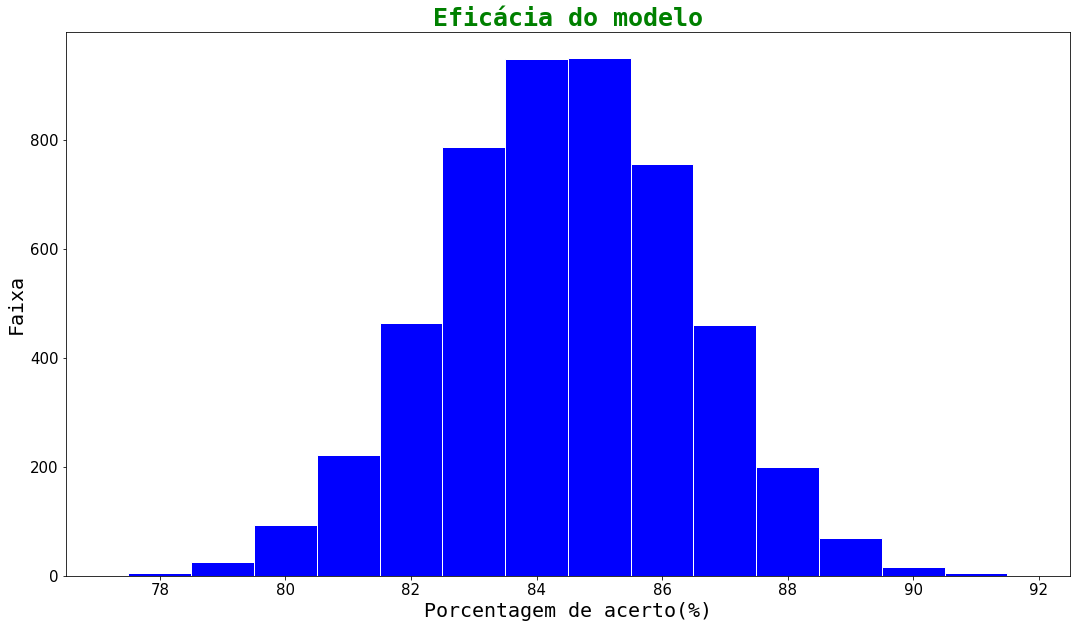

In [41]:
# Histograma 
plt.rcParams["figure.figsize"] = (18,10)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.hist(eficacia2, bins=faixa, edgecolor='white', color = 'blue', density = False)
plt.title('Eficácia do modelo',fontsize=25,fontfamily = 'monospace', fontweight = 'semibold',color='g')
plt.ylabel('Faixa',fontsize=20,fontfamily = 'monospace')
plt.xlabel('Porcentagem de acerto(%)',fontsize=20,fontfamily = 'monospace')
plt.xlim(menor,maior + 1)
plt.show()


- ### Análise do histograma 

Observa-se que a eficácia média do modelo implementado ficou em torno de 84.193 %, com picos de maior eficácia em torno desse valor, que variavam em torno de um intervalo mínimo de 76,5% e máximo de 91.5 %. No histograma é possível perceber uma variância de eficácia produzidas pelo classificador,isto é a comutação nesse intervalo com picos variáveis. Tal ocorrência se deve ao cruzamento de atributos de treinamentos, o qual se tinha certeza de classificação, com atributos de teste. O embaralhamento dos atributos, contribui para que não se tenha a certeza perante todos as classificações, ficando a análise a dispor das funções implementadas no classficador. Ao se sortear o dataFrame de treinamento gera-se uma uma maior propagação de erros que faz com que se tenha uma falsa eficácia do classificador, ao se comparar a uma classificação que se teria ao fixar uma mesma base de treinamento.

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**